In [240]:
import pandas as pd 
import numpy as np

In [241]:
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
mql.head(5)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [242]:
cd = pd.read_csv('olist_closed_deals_dataset.csv')
cd.head(5)
cd.shape

(842, 14)

In [243]:
cd_ml=pd.merge(mql,cd,how='left',on='mql_id')
cd_ml.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


# #########
# Topic1: predict sales trend

In [244]:

seller = pd.read_csv('olist_order_items_dataset.csv')

In [245]:
# marketing funnel dataset (NaNs are leads that did not close a deal)
mql_sell=cd_ml.merge(seller, how = 'left',on = 'seller_id')

In [246]:
sell=mql_sell[['mql_id','first_contact_date','seller_id','won_date','price']]

In [247]:
sell=sell.dropna()
print(sell.shape)

(5044, 5)


In [248]:
new=sell.won_date.str.split('-',n = 2, expand = True)
sell['date_year']=new[0]
sell['date_month']=new[1]
sell['close_date'] = sell['date_year'] + sell['date_month']
sell.head(3)

,mql_id,first_contact_date,seller_id,won_date,price,date_year,date_month,close_date
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,2c43fb513632d29b3b58df74816f1b06,2018-02-26 19:58:54,94.2,2018,02,201802
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,2c43fb513632d29b3b58df74816f1b06,2018-02-26 19:58:54,664.0,2018,02,201802
6,5420aad7fec3549a85876ba1c529bd84,2018-02-21,2c43fb513632d29b3b58df74816f1b06,2018-02-26 19:58:54,99.8,2018,02,201802


In [249]:
price_month=sell.groupby('close_date').sum()
price_month

,price
close_date,
201712,862.90
201801,49381.79
201802,240477.75
201803,150977.39
201804,128652.90
201805,59149.08
201806,39541.83
201807,7318.84
201808,489.00


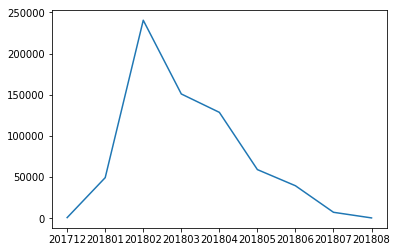

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(price_month.index, price_month.price )

# ##############################
# Topic2:Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

In [251]:
seller.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [252]:
prod=pd.read_csv('olist_products_dataset.csv')
name=pd.read_csv('product_category_name_translation.csv')

In [253]:
ord_r=pd.read_csv('olist_order_reviews_dataset.csv')
ord_r.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [254]:
####merge three tables to get the product review score and product names
r_sell=ord_r.merge(seller,how='left',on='order_id')
prod_r=r_sell.merge(prod,how='left',on='product_id')
prod_r=prod_r.merge(name,how='left',on='product_category_name')
prod_r.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [255]:
prod_score=prod_r[['product_category_name_english',
                   'product_id','review_score']]

In [256]:
prod_score.columns=['product_name','product_id','review_score']

In [257]:
prod_score.isnull().sum()

product_name    2414
product_id       778
review_score       0
dtype: int64

In [258]:
prod_score.shape

(114100, 3)

In [259]:
prod_score=prod_score.dropna()
prod_score.shape

(111686, 3)

In [260]:
prod_score.head(5)

,product_name,product_id,review_score
0,sports_leisure,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,sports_leisure,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,computers_accessories,be0dbdc3d67d55727a65d4cd696ca73c,5
3,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,garden_tools,52c80cedd4e90108bf4fa6a206ef6b03,5


In [261]:
####Calculate the total scores
score=prod_score.groupby('product_name').sum()
score['product_name']=score.index
score.head(5)

,review_score,product_name
product_name,,
agro_industry_and_commerce,848,agro_industry_and_commerce
air_conditioning,1164,air_conditioning
art,819,art
arts_and_craftmanship,99,arts_and_craftmanship
audio,1390,audio


In [262]:
###Calculate the number of products
product_count=prod_score.product_name.value_counts()
print(product_count.head(5))

bed_bath_table           11272
health_beauty             9728
sports_leisure            8701
furniture_decor           8416
computers_accessories     7895
Name: product_name, dtype: int64


In [263]:
####Add column about product_count and average score
score['product_count']=product_count
score['score_per']=score.review_score/score.product_count
score.head(5)

,review_score,product_name,product_count,score_per
product_name,,,,
agro_industry_and_commerce,848,agro_industry_and_commerce,212,4.000000
air_conditioning,1164,air_conditioning,297,3.919192
art,819,art,209,3.918660
arts_and_craftmanship,99,arts_and_craftmanship,24,4.125000
audio,1390,audio,365,3.808219


In [264]:

score['score_per']=score.review_score/score.product_count
score.index=range(71)
#####The bottom 10 product names with low average review score
score.sort_values(['score_per'],ascending=True).head(10)

,review_score,product_name,product_count,score_per
61,5,security_and_services,2,2.500000
23,127,diapers_and_hygiene,39,3.256410
46,101,home_comfort_2,30,3.366667
57,5927,office_furniture,1701,3.484421
30,478,fashion_male_clothing,132,3.621212
34,973,fixed_telephony,265,3.671698
58,162,party_supplies,43,3.767442
27,189,fashio_female_clothing,50,3.780000
52,53,la_cuisine,14,3.785714
4,1390,audio,365,3.808219


In [265]:
###The Top 10 product names with high average score
score.sort_values(['score_per'],ascending=True).tail(10)

,review_score,product_name,product_count,score_per
32,132,fashion_sport,31,4.258065
64,327,small_appliances_home_oven_and_coffee,76,4.302632
37,1205,food_drink,280,4.303571
53,4706,luggage_accessories,1092,4.309524
10,1167,books_technical,269,4.338290
22,449,costruction_tools_tools,103,4.359223
9,264,books_imported,60,4.400000
8,2455,books_general_interest,553,4.439421
29,36,fashion_childrens_clothes,8,4.500000
11,65,cds_dvds_musicals,14,4.642857
